<img src='pics/otus.png'>

In [2]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")


## 0. Выберите любой датасет, связанный с медицинской тематикой.

Выбран датасет https://www.kaggle.com/ruslankl/mice-protein-expression

# 1. Провести EDA
Просмотреть структуру данных, значения каждого признака, поискать особенности в признаках и в данных вцелом

In [3]:
df =pd.read_csv('Data_Cortex_Nuclear.csv')

In [4]:
df.head(3)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.50,0.75,0.43,2.82,5.99,0.22,0.18,2.37,0.23,...,0.11,0.43,0.11,0.13,0.13,1.68,Control,Memantine,C/S,c-CS-m
1,309_2,0.51,0.69,0.41,2.79,5.69,0.21,0.17,2.29,0.23,...,0.10,0.44,0.11,0.14,0.13,1.74,Control,Memantine,C/S,c-CS-m
2,309_3,0.51,0.73,0.42,2.69,5.62,0.21,0.18,2.28,0.23,...,0.11,0.44,0.11,0.13,0.13,1.93,Control,Memantine,C/S,c-CS-m


Краткое описание признаков:
[1] Mouse ID

[2:78] Values of expression levels of 77 proteins; the names of proteins are followed by N indicating that they were measured in the nuclear fraction. *For example: DYRK1A_n*

[79] Genotype: control (c) or trisomy (t)

[80] Treatment type: memantine (m) or saline (s)

[81] Behavior: context-shock (CS) or shock-context (SC)

[82] Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

В качеcтве целевой переменной будем использовать классы, признаки - сила экспрессии в генах.

Уберем лишнее и проанализируем, какие значения у нас есть

In [5]:
df = df.drop(labels = ['MouseID', 'Genotype', 'Treatment', 'Behavior'], axis=1) 

In [6]:
df.head(3)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.50,0.75,0.43,2.82,5.99,0.22,0.18,2.37,0.23,1.75,...,0.12,nan,0.11,0.11,0.43,0.11,0.13,0.13,1.68,c-CS-m
1,0.51,0.69,0.41,2.79,5.69,0.21,0.17,2.29,0.23,1.60,...,0.12,nan,0.11,0.10,0.44,0.11,0.14,0.13,1.74,c-CS-m
2,0.51,0.73,0.42,2.69,5.62,0.21,0.18,2.28,0.23,1.56,...,0.12,nan,0.11,0.11,0.44,0.11,0.13,0.13,1.93,c-CS-m


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 78 columns):
DYRK1A_N           1077 non-null float64
ITSN1_N            1077 non-null float64
BDNF_N             1077 non-null float64
NR1_N              1077 non-null float64
NR2A_N             1077 non-null float64
pAKT_N             1077 non-null float64
pBRAF_N            1077 non-null float64
pCAMKII_N          1077 non-null float64
pCREB_N            1077 non-null float64
pELK_N             1077 non-null float64
pERK_N             1077 non-null float64
pJNK_N             1077 non-null float64
PKCA_N             1077 non-null float64
pMEK_N             1077 non-null float64
pNR1_N             1077 non-null float64
pNR2A_N            1077 non-null float64
pNR2B_N            1077 non-null float64
pPKCAB_N           1077 non-null float64
pRSK_N             1077 non-null float64
AKT_N              1077 non-null float64
BRAF_N             1077 non-null float64
CAMKII_N           1077 non-null

Есть значения, где есть нулевые значения, заполним их средними значениями из групп

In [8]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.00,1077.00,1077.00,1077.00,1077.00,1077.00,1077.00,1077.00,1077.00,1077.00,...,1080.00,867.00,795.00,1080.00,1005.00,1080.00,900.00,870.00,810.00,1080.00
mean,0.43,0.62,0.32,2.30,3.84,0.23,0.18,3.54,0.21,1.43,...,0.23,0.16,0.13,0.12,0.13,0.45,0.17,0.18,0.21,1.34
std,0.25,0.25,0.05,0.35,0.93,0.04,0.03,1.30,0.03,0.47,...,0.03,0.03,0.03,0.01,0.02,0.07,0.06,0.04,0.06,0.32
min,0.15,0.25,0.12,1.33,1.74,0.06,0.06,1.34,0.11,0.43,...,0.16,0.09,0.08,0.07,0.09,0.26,0.08,0.11,0.10,0.59
25%,0.29,0.47,0.29,2.06,3.16,0.21,0.16,2.48,0.19,1.20,...,0.21,0.14,0.12,0.11,0.11,0.40,0.13,0.16,0.17,1.08
50%,0.37,0.57,0.32,2.30,3.76,0.23,0.18,3.33,0.21,1.36,...,0.22,0.15,0.13,0.12,0.13,0.45,0.16,0.17,0.19,1.32
75%,0.49,0.70,0.35,2.53,4.44,0.26,0.20,4.48,0.23,1.56,...,0.24,0.17,0.15,0.13,0.14,0.49,0.20,0.20,0.24,1.59
max,2.52,2.60,0.50,3.76,8.48,0.54,0.32,7.46,0.31,6.11,...,0.36,0.28,0.26,0.16,0.26,0.76,0.48,0.36,0.41,2.13


Показатели имеют различный разброс - нужно его выровнить

In [9]:
import seaborn

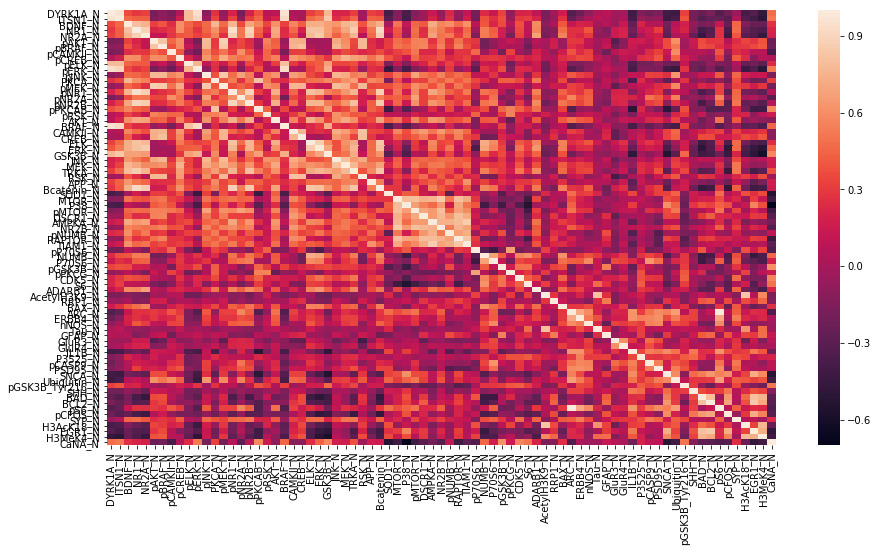

In [10]:
corr = df.corr()
seaborn.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# 2. Спланировать эксперимент 


Эксперимент - составить план, по которому будет проделана исследовательская работа. Примерные пункты плана:
* Составить первичный список признаков, необходимых для решения задачи
* Сгенерировать список новых признаков, которые можно получить из данных
* Применить понижение размерности для визуализации данных
* Применить кластеризацию, визуализировать
* Описание кластера
* Любые другие пункты

- 1 - заполнить нулевые значения средними по выборке
- 2 - генерировать не будем, их и так много, да и сложно комбинировать экспрессию в генах
- 3 - отмасштабировать призники
- 4 - перевести целевую переменную в категориальную
- 5 - Применить logistic regression с cv на 5 фолдов
- 6 - точность проверям accuracy
- 7 - понижаем размерность  по PCA (до 2 и до оптимального параметра)
- 8 - визуализируем 
- 9 - снова применяем log regression
- 10 - точность проверям accuracy
- 11 - понижаем размерность  по tsne (до 2 и до оптимального параметра)
- 12 - визуализируем 
- 13 - снова применяем log regression
- 14 - точность проверям accuracy
- 15 - ради интереса класстиризуем и визуализируем

# 3. Выполнить подготовку данных для построения модели

Выполнить необходимые преобразования данных

In [11]:
y = df['class']

In [12]:
X = df.drop('class', axis=1)

In [13]:
X.fillna(X.mean(), inplace=True)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 77 columns):
DYRK1A_N           1080 non-null float64
ITSN1_N            1080 non-null float64
BDNF_N             1080 non-null float64
NR1_N              1080 non-null float64
NR2A_N             1080 non-null float64
pAKT_N             1080 non-null float64
pBRAF_N            1080 non-null float64
pCAMKII_N          1080 non-null float64
pCREB_N            1080 non-null float64
pELK_N             1080 non-null float64
pERK_N             1080 non-null float64
pJNK_N             1080 non-null float64
PKCA_N             1080 non-null float64
pMEK_N             1080 non-null float64
pNR1_N             1080 non-null float64
pNR2A_N            1080 non-null float64
pNR2B_N            1080 non-null float64
pPKCAB_N           1080 non-null float64
pRSK_N             1080 non-null float64
AKT_N              1080 non-null float64
BRAF_N             1080 non-null float64
CAMKII_N           1080 non-null

In [15]:
from sklearn import preprocessing

In [16]:
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
X_scaled[0:1]

array([[0.1511224 , 0.21288505, 0.82463786, 0.61211939, 0.63048232,
        0.32700587, 0.44866634, 0.16825719, 0.61732205, 0.23255279,
        0.15764338, 0.57616682, 0.74768812, 0.59850371, 0.57477459,
        0.28669707, 0.65063705, 0.69816413, 0.62278415, 0.71119844,
        0.13691507, 0.41964854, 0.31714888, 0.59371483, 0.6279069 ,
        0.59626875, 0.64016736, 0.64307006, 0.76614614, 0.29559592,
        0.54981707, 0.74744085, 0.09203489, 0.54119566, 0.15233784,
        0.68726926, 0.55392167, 0.46727792, 0.5099961 , 0.46946126,
        0.4361703 , 0.50601753, 0.16336829, 0.32305865, 0.37325416,
        0.60451592, 0.30336345, 0.17845796, 0.32408545, 0.40280956,
        0.08358366, 0.32786962, 0.69025721, 0.42681623, 0.4127206 ,
        0.47783402, 0.05716795, 0.22882536, 0.53116295, 0.15110301,
        0.24260849, 0.16970155, 0.43284301, 0.48378312, 0.04476956,
        0.25669889, 0.40522832, 0.16294068, 0.17731204, 0.29917191,
        0.42681623, 0.13392994, 0.33629928, 0.08

Теперь y

In [18]:
y = y.astype('category')

In [19]:
le = preprocessing.LabelEncoder()

In [20]:
y = le.fit_transform(y)

In [21]:
le.classes_

array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
       't-SC-m', 't-SC-s'], dtype=object)

In [22]:
unique, counts = np.unique(y, return_counts=True)

In [23]:
unique, counts


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([150, 135, 150, 135, 135, 105, 135, 135], dtype=int64))

Классы относительно уравновешены 

# 4. Провести построение модели 

Сначала обучим LogRegression c 5 CV. И проверим качество на accuarcy

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [25]:
from sklearn.linear_model import LogisticRegressionCV

In [26]:
lr = LogisticRegressionCV(cv=5)

In [27]:
lr.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [28]:
y_predict = lr.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score


In [30]:
accuracy_score(y_test, y_predict)

0.9938271604938271

Неплохая оценка

In [31]:
lr.coef_.shape

(8, 77)

In [32]:
lr.coef_.mean(axis=0)

array([-1.35443092, -2.64233008,  0.68224641, -0.81138228,  0.39438093,
        0.14679517, -0.03198994,  2.26004841, -1.50847649, -0.94783431,
       -1.44678211, -0.15006138,  0.07025983,  0.2191856 ,  0.35139063,
       -1.06937807, -1.79939539, -1.29687552,  1.35767072,  2.10187199,
       -0.74732039, -1.08554471,  0.68790955,  0.61854755, -0.38198885,
       -2.14835984,  1.80665487,  0.58429002,  0.71666128, -0.60755926,
       -1.66373397, -0.76068133, -1.19957541,  1.94514083,  0.35068491,
       -0.98762378, -0.97245521,  0.19385382,  0.27952236, -1.43920139,
        0.42287361, -1.5117325 , -2.22289867, -2.22079796, -1.89012628,
        0.98199317, -1.74151286, -0.82410715, -1.96247195,  0.29995267,
        0.91358106, -1.72414459, -0.76837603, -0.24152658,  1.28492903,
        0.86742034, -0.66444029, -1.40711477, -0.80489239, -0.79257365,
        1.06822498,  2.4414133 , -1.31459039,  0.69541866, -2.81392735,
       -0.31761962,  0.45169812, -0.24364417,  0.45564985, -0.80

In [33]:
lr.coef_.max(axis=0)

array([ 4.33280844,  7.03555938, 10.3824956 ,  7.26492949, 12.13294434,
        5.63133754,  8.59595884, 13.00819949,  3.74834426,  2.26854453,
        2.82395891, 15.76556662, 14.10977406,  3.01329458, 12.69915003,
       14.04476805,  3.93483555, 10.3196259 ,  8.94991895, 23.4213889 ,
        8.26325923,  9.20379121,  6.9889443 ,  7.06640008, 11.04293701,
        5.61292608, 11.31712637,  3.99103158, 11.27336526, 10.20836563,
       16.24394073,  6.36696762, 14.58240895, 22.63996874,  8.60670059,
        6.85913232,  7.29906026,  5.23663908,  6.64605627, 10.40006572,
        7.63315652, 10.62200438,  5.62313089,  5.31447138,  5.77382885,
        8.95213843,  9.76542884,  2.24572035, 10.73015927,  9.11227452,
        7.78050841,  5.62931339,  4.51627538,  3.21837566, 10.44296755,
       12.95815681, 13.41482254,  4.94207362,  9.16397112,  2.35345942,
       10.16414956, 11.27627989, 16.55148955,  5.30590701,  4.41890934,
        4.5633963 , 10.89069662,  6.01852348,  4.25564541,  4.44

In [34]:
np.abs(lr.coef_).min(axis=0)

array([1.28666770e+00, 2.31749924e-01, 2.20572026e-01, 6.71132944e-01,
       5.45385573e-03, 5.37260156e-01, 6.58252028e-01, 1.09465043e+00,
       1.56783125e+00, 4.75009583e-01, 5.05257641e-02, 2.01693420e-01,
       5.97223897e-01, 1.78963753e-02, 9.66038513e-01, 1.13468189e-01,
       1.24911797e+00, 2.82846583e+00, 2.70734600e-02, 1.81192950e-01,
       3.83389673e-01, 3.49181977e-01, 1.01948111e-01, 4.51379792e-03,
       4.13062788e-01, 7.71397930e-01, 1.58312035e-01, 6.96509764e-01,
       1.71221318e-02, 1.18908189e-01, 1.63094591e+00, 9.94113738e-01,
       2.42439331e+00, 4.15324730e-02, 2.06145559e+00, 2.40795504e-01,
       5.73861571e-01, 6.43275486e-01, 7.75430362e-01, 3.86473490e-01,
       1.85362670e-01, 2.92487827e+00, 1.89485829e+00, 5.10559757e-01,
       2.26903226e+00, 1.71913423e+00, 2.75081026e+00, 4.72596958e-01,
       2.99805971e-01, 2.76819735e-01, 1.19952032e-02, 2.86543158e-01,
       4.41357530e-02, 1.51394356e-01, 1.76380836e-01, 6.30906395e-02,
      

Чисто визуально, коэффициенты НЕ занижены.

Немного украдем кода из лекции:

In [35]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

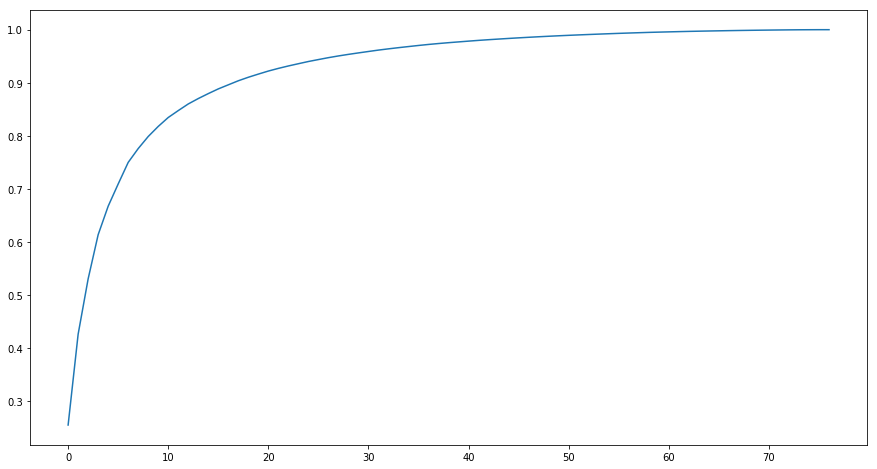

In [36]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

Возьмем первые 20

In [37]:
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(x_train)

In [38]:
lr = LogisticRegressionCV(cv=5)
lr.fit(x_train_pca, y_train)
y_pred20 = lr.predict(pca.transform(x_test))
accuracy_score(y_test, y_pred20)

0.9104938271604939

Упало, но не намного. Повторим для n=2, чтобы визуализировать

In [39]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
lr = LogisticRegressionCV(cv=5)
lr.fit(x_train_pca, y_train)
y_pred = lr.predict(pca.transform(x_test))
accuracy_score(y_test, y_pred)

0.33024691358024694

Как видно, точно очень плохая. Попробуем визуализировать

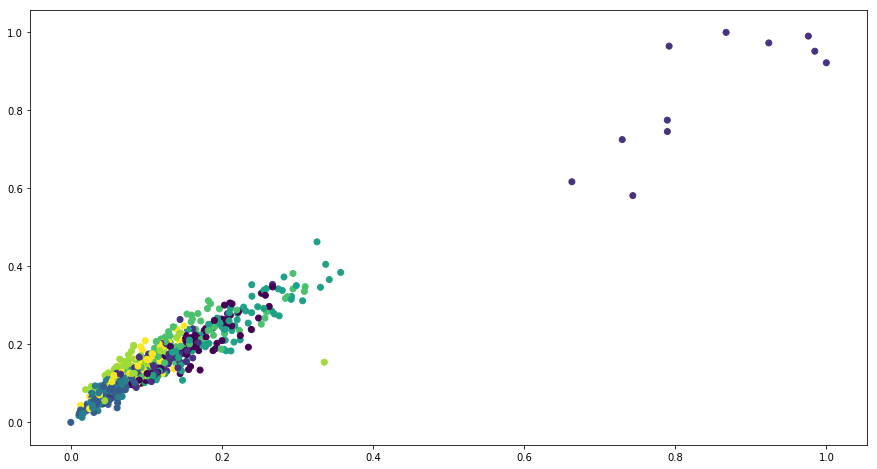

In [40]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

Не очень четко

Теперь повторим в from sklearn.manifold import TSNE

In [41]:
from sklearn.manifold import TSNE

Text(0.5, 1.0, 'Попытка разграничение с TSNE. Классы истинные, perplexity = 30')

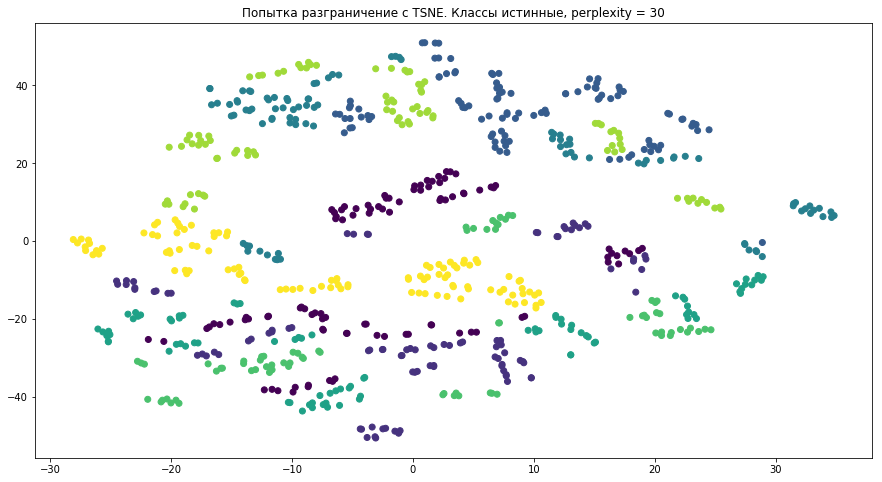

In [42]:
tsne = TSNE(n_components=2)
x_train_tsne = tsne.fit_transform(x_train)
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=y_train)
plt.title('Попытка разграничение с TSNE. Классы истинные, perplexity = 30')

Text(0.5, 1.0, 'Попытка разграничение с TSNE. Классы истинные, perplexity = 5')

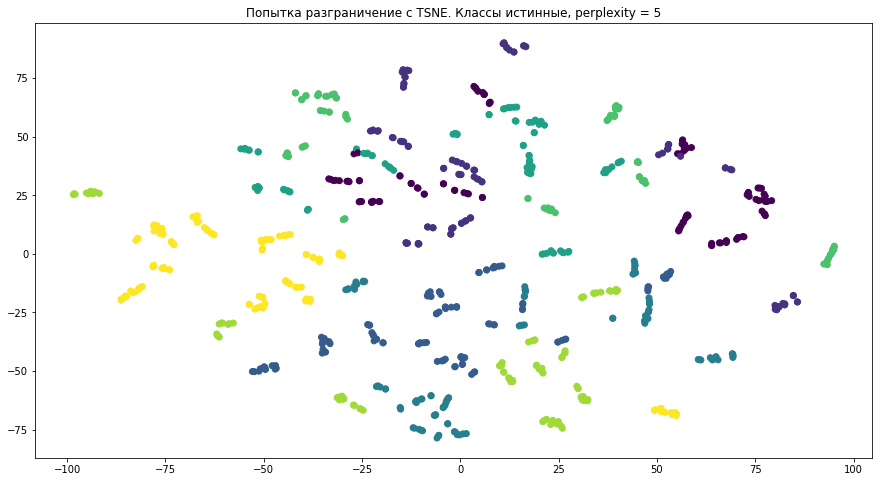

In [43]:
tsne = TSNE(n_components=2, perplexity = 5)
x_train_tsne = tsne.fit_transform(x_train)
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=y_train)
plt.title('Попытка разграничение с TSNE. Классы истинные, perplexity = 5')

Text(0.5, 1.0, 'Попытка разграничение с TSNE. Классы истинные, perplexity = 50')

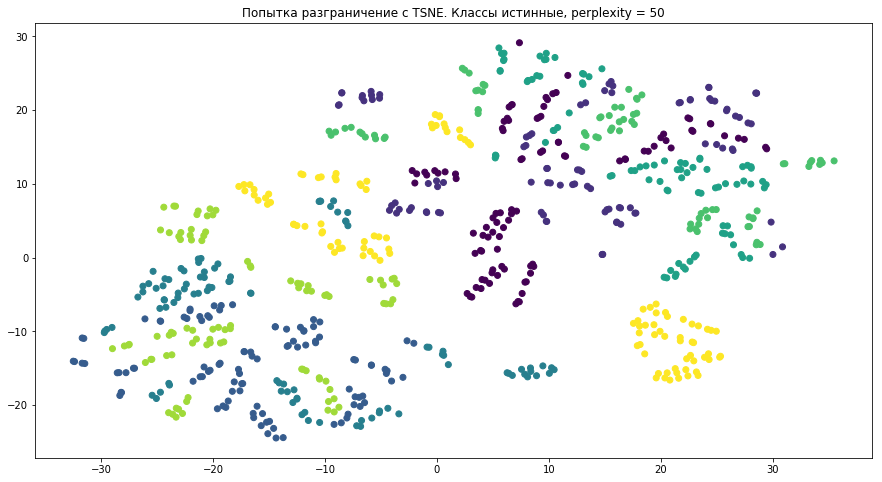

In [44]:
tsne = TSNE(n_components=2, perplexity = 50, )
x_train_tsne = tsne.fit_transform(x_train)
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=y_train)
plt.title('Попытка разграничение с TSNE. Классы истинные, perplexity = 50')

Text(0.5, 1.0, 'Попытка разграничение с TSNE. Классы истинные, perplexity = 50, learning_rate =500')

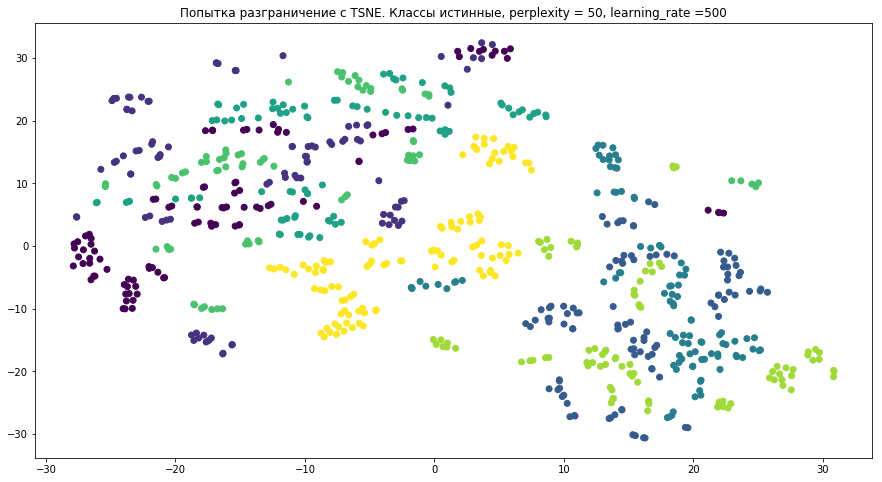

In [45]:
tsne = TSNE(n_components=2, perplexity = 50, learning_rate =500)
x_train_tsne = tsne.fit_transform(x_train)
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=y_train)
plt.title('Попытка разграничение с TSNE. Классы истинные, perplexity = 50, learning_rate =500')

Попробуем выполнить кластеризацию и визиализируем ее на tsne

In [46]:
from sklearn.cluster import DBSCAN

In [47]:
sc = DBSCAN(eps = 0.6)

In [48]:
y_dbscan = sc.fit_predict(x_train)

Text(0.5, 1.0, 'Попытка разграничение с TSNE. DBSCAN, perplexity = 50, learning_rate =500')

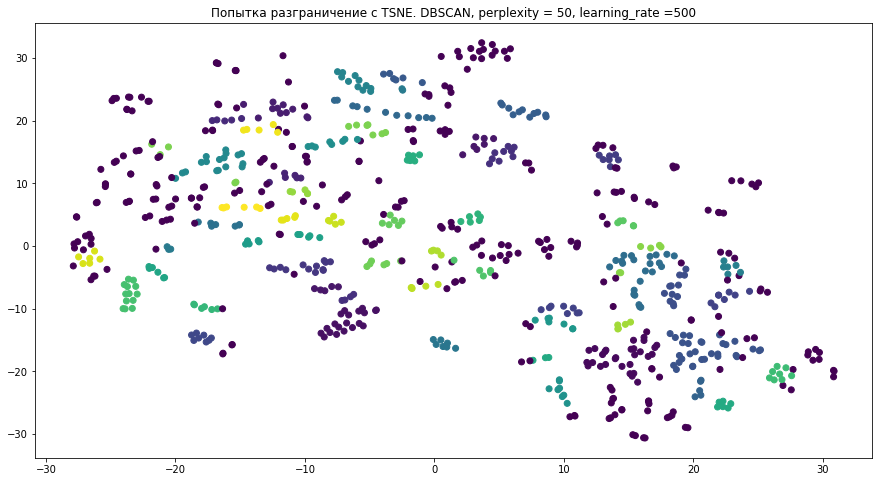

In [49]:

plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=y_dbscan)
plt.title('Попытка разграничение с TSNE. DBSCAN, perplexity = 50, learning_rate =500')

# 5. Проанализировать результат
получилось или нет, почему, что можно улучшить, можно ли интерпретировать результат

Что получилось: 
    - подготовить признаки для логистической регрессии
    - уменьшить количество признаков без значимого падения точности
    - неплохая попытка визуализации с помощью TSNE
Что не получилось:
    - точное разделение при 2 мерной проекции. 
    хотя скорее всего этого добиться сложно, 
    так как много классов и как было отмечено 
    при анализе логистической регрессии значимость признаков довольно близка
    - классификация - что в принципе и ожидалось,
    так как сложно подобрать оптимальные параметры. 

# 6. Повторить при необходимости 

Попробуем kmeans)

In [50]:
from sklearn.cluster import KMeans

In [51]:
km = KMeans(n_clusters=8)

In [52]:
y_km = km.fit_predict(x_train)

Text(0.5, 1.0, 'Попытка разграничение с TSNE. KMeans, perplexity = 50, learning_rate =500')

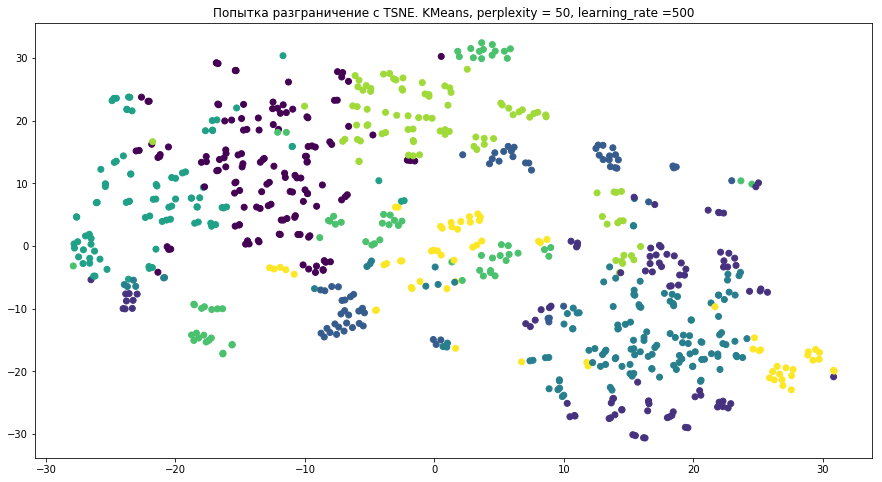

In [53]:

plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=y_km)
plt.title('Попытка разграничение с TSNE. KMeans, perplexity = 50, learning_rate =500')

Попытка не очень удачная, зато визуализация очень хорошая)

# Подсказки

* Проводить EDA и работу с признаками на всем датасете
* Для построения модели отсеивать данные тем или иным способом (обосновать выбор) - уменьшить объем данных для анализа
* Оформлять для сдачи задания все эксперименты (в том числе неудачные). Так мы сможем увидеть процесс работы над заданием
* Не тратить 90% времени на первый этап. Планировать время так, чтобы успеть поработать над моделью (в равной степени над каждым пунктом).

In [54]:
df = pd.read_csv('data.csv')
df.head()

FileNotFoundError: File b'data.csv' does not exist

In [ ]:
df['diagnosis'] = pd.Categorical(df.diagnosis).codes 
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.head()

In [ ]:
X = df.drop(['id', 'diagnosis'], axis=1).as_matrix()
X.shape

In [ ]:
y = df['diagnosis'].as_matrix()
y.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

In [ ]:
dir(pca)

In [ ]:
pca.components_
